In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/user/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
x = df.drop('price' , axis = 1)
y = df['price']

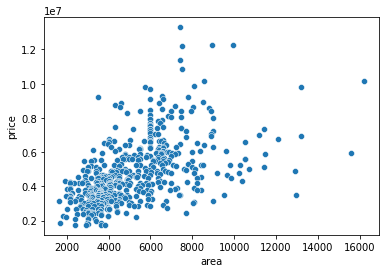

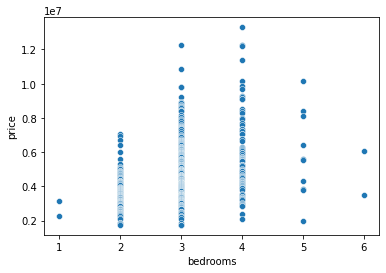

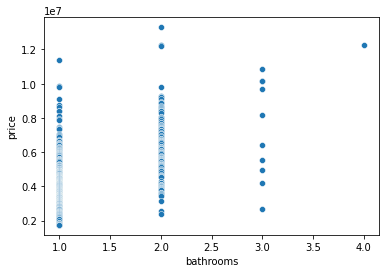

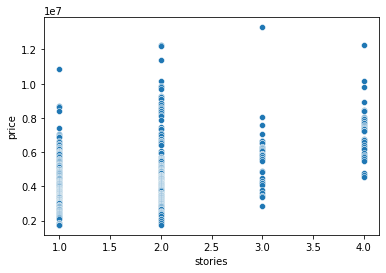

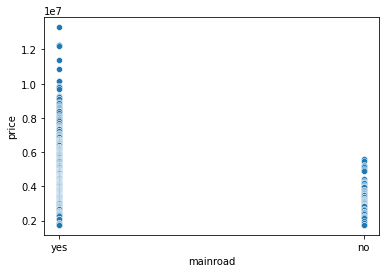

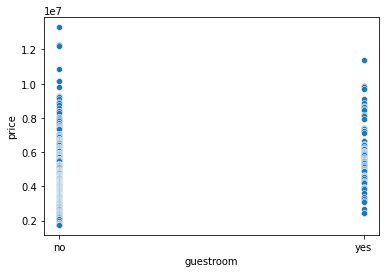

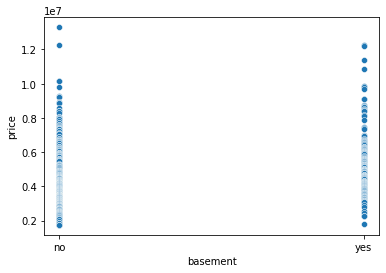

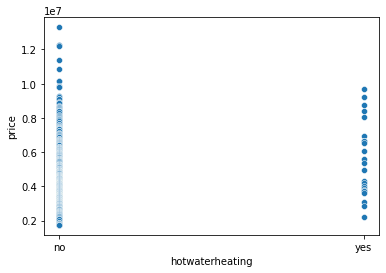

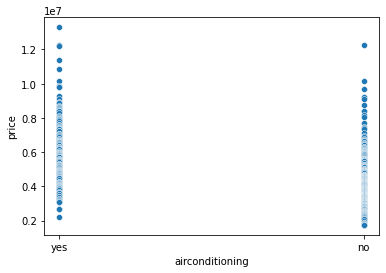

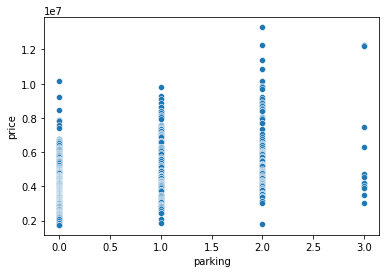

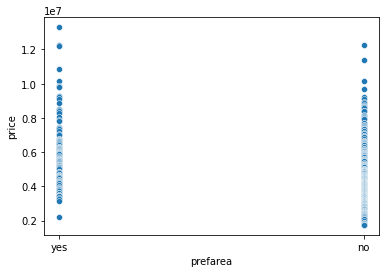

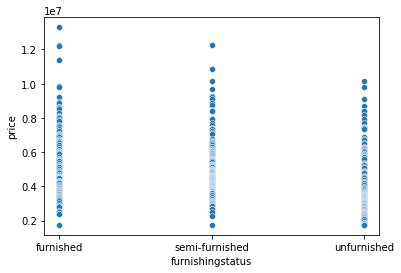

In [10]:
for col in x.columns:
    sns.scatterplot(x=col , y = 'price' , data =df)
    plt.show()

In [11]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [12]:
cols = df.select_dtypes(include = ['object'])

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in cols:
    if col != 'furnishingstatus' :
        df[col] = label.fit_transform(df[col])

In [13]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad             int64
guestroom            int64
basement             int64
hotwaterheating      int64
airconditioning      int64
parking              int64
prefarea             int64
furnishingstatus    object
dtype: object

In [14]:
df = pd.get_dummies(df, columns=['furnishingstatus'] , drop_first=True)

In [15]:
df.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object

In [16]:
df.select_dtypes(include=['number'])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0


In [17]:
x = df.drop('price' , axis = 1)
y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 42)

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([5372312.61614641, 7069241.00525806, 3099290.78784024,
       4526446.61703975, 3281573.61192656, 3589455.18752548,
       5728625.30074517, 6422877.52476236, 2797870.49568591,
       2554357.99210551, 9693560.19894657, 2802903.76131031,
       3026465.95300837, 3433891.33202092, 3792786.34565513,
       5321204.36478554, 2999852.37322993, 4813306.52790377,
       4572077.61633939, 3595733.80237382, 5605701.03333099,
       5838934.41614982, 2730716.89440109, 4837741.37096246,
       5638460.49223857, 7809681.30410656, 3347443.37529207,
       5328750.6625753 , 8323072.8323739 , 3374792.28854334,
       6379706.15324898, 3397999.89564252, 6709115.8233402 ,
       4249666.18392567, 3594972.20315591, 5842994.13027721,
       5115480.11172668, 4359421.90319848, 3046570.15372424,
       4597379.56416964, 4784358.1758961 , 3411743.78220679,
       7048978.02507302, 4062741.36892573, 3785699.24160861,
       4286017.77250844, 6729020.20739641, 4133428.23821411,
       3845434.09183083,

In [20]:
error = y_pred - y_test

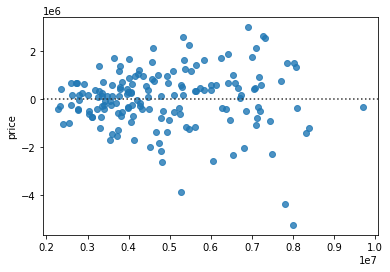

In [21]:
sns.residplot(x=y_pred , y =error)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error,r2_score 

mse = mean_squared_error(y_test , y_pred)
mse

1523019469501.2913

In [26]:
r2 = r2_score(y_test , y_pred)
r2

0.6463350878895877

In [30]:
n = len(y_test)
p = len(x)

num = (1-r2) * (n - 1)
den = n-p-1

In [31]:
adr = 1-(num/den)

In [32]:
adr

1.1509093734921394